## PROYECTO ML

In [284]:
#Importar librerias necesarias de inicio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
#Carga CSV
df = pd.read_csv("data/Bullying_2018.csv", sep=";")

In [286]:
#Vemos qué datos hay
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


In [287]:
#Vemos las columnas y sus tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [288]:
#Comprobamos NaN
df.isna().sum()

record                                              0
Bullied_on_school_property_in_past_12_months        0
Bullied_not_on_school_property_in_past_12_months    0
Cyber_bullied_in_past_12_months                     0
Custom_Age                                          0
Sex                                                 0
Physically_attacked                                 0
Physical_fighting                                   0
Felt_lonely                                         0
Close_friends                                       0
Miss_school_no_permission                           0
Other_students_kind_and_helpful                     0
Parents_understand_problems                         0
Most_of_the_time_or_always_felt_lonely              0
Missed_classes_or_school_without_permission         0
Were_underweight                                    0
Were_overweight                                     0
Were_obese                                          0
dtype: int64

In [289]:
#Vemos cuantas categorias tenemos por cada variable
for col in df:
    print(df[col].nunique())

56981
3
3
3
9
3
9
9
6
5
6
6
6
3
3
3
3
3


In [290]:
#Eliminamos columnas innecesarias
df.drop(columns='record', axis=1, inplace=True)

In [291]:
#Limpiamos los datos y pasamos todo lo que podamos a variables binarias y rellenamos los valores en blanco con NaN
df['Custom_Age'] = df['Custom_Age'].str.replace(' years old', '')
df['Close_friends'] = df['Close_friends'].str.replace(' or more', '')
df['Physically_attacked'] = df['Physically_attacked'].str.replace('times', '')
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].str.replace(' or more days', '')
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].str.replace(' days', '')
df['Physical_fighting'] = df['Physical_fighting'].str.replace(' times', '')
df['Bullied_on_school_property_in_past_12_months'] = df['Bullied_on_school_property_in_past_12_months'].replace({"No": 0, "Yes": 1})
df['Bullied_not_on_school_property_in_past_12_months'] = df['Bullied_not_on_school_property_in_past_12_months'].replace({"No": 0, "Yes": 1})
df['Cyber_bullied_in_past_12_months'] = df['Cyber_bullied_in_past_12_months'].replace({"No": 0, "Yes": 1})
df['Most_of_the_time_or_always_felt_lonely'] = df['Most_of_the_time_or_always_felt_lonely'].replace({"No": 0, "Yes": 1})
df['Missed_classes_or_school_without_permission'] = df['Missed_classes_or_school_without_permission'].replace({"No": 0, "Yes": 1})
df['Were_underweight'] = df['Were_underweight'].replace({"No": 0, "Yes": 1})
df['Were_overweight'] = df['Were_overweight'].replace({"No": 0, "Yes": 1})
df['Were_obese'] = df['Were_obese'].replace({"No": 0, "Yes": 1})
df['Sex'] = df['Sex'].replace({'Male': 0, 'Female': 1})
df['Custom_Age'] = df['Custom_Age'].replace({'18 or older': 18})
df['Custom_Age'] = df['Custom_Age'].replace({'11 or younger': 11})
df.replace(' ', pd.NA, inplace=True)


In [292]:
df.head()

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,1,<NA>,13,1,0,0,Always,2,10,Never,Always,1,1,<NA>,<NA>,<NA>
1,0,0,0,13,1,0,0,Never,3,0,Sometimes,Always,0,0,<NA>,<NA>,<NA>
2,0,0,0,14,0,0,0,Never,3,0,Sometimes,Always,0,0,0,0,0
3,0,0,0,16,0,0,2 or 3,Never,3,0,Sometimes,<NA>,0,0,0,0,0
4,0,0,0,13,1,0,0,Rarely,3,0,Most of the time,Most of the time,0,0,<NA>,<NA>,<NA>


In [293]:
# Transformamos en variables binarias las variables con más categorias
mapa = {'0': 0,
        '2 or 3': 1,
        '1 time': 1,
        '4 or 5': 1,
        '6 or 7': 1,
        '8 or 9': 1,
        '10 or 11': 1,
        '12 or more': 1}

df['Physical_fighting'] = df['Physical_fighting'].replace(mapa)

In [294]:
mapa_2 = {'0 ': 0,
        '2 or 3 ': 1,
        '4 or 5 ': 1,
        '6 or 7 ': 1,
        '8 or 9 ': 1,
        '10 or 11 ': 1,
        '12 or more ': 1,
        '1 time': 1}
df['Physically_attacked'] = df['Physically_attacked'].replace(mapa_2)

In [295]:
mapa_3 = {'0': 0,
        '1 or 2': 1,
        '3 to 5': 1,
        '6 to 9': 1,
        '8 or 9': 1,
        '10': 1}
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace(mapa_3)

In [296]:
mapa_4 = {'0': 0,
        '1': 1,
        '2': 1,
        '3': 1}
df['Close_friends'] = df['Close_friends'].replace(mapa_4)

In [297]:
#Dummies con las variables que creo que no pueden convertirse en binarias
prefix_col =  ['Lonely', 'Students_kind', 'Parents_understand']
dummi_col = ['Felt_lonely','Other_students_kind_and_helpful', 'Parents_understand_problems']
df = pd.get_dummies(df, prefix=prefix_col, columns=dummi_col)

In [298]:
df.head()

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Close_friends,Miss_school_no_permission,Most_of_the_time_or_always_felt_lonely,...,Students_kind_Always,Students_kind_Most of the time,Students_kind_Never,Students_kind_Rarely,Students_kind_Sometimes,Parents_understand_Always,Parents_understand_Most of the time,Parents_understand_Never,Parents_understand_Rarely,Parents_understand_Sometimes
0,1,1,<NA>,13,1,0,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,13,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,14,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,16,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,13,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [299]:
#Hay muchos valores vacios en todas las columnas, los imputo con la media de cada columna.
df.isna().sum()/ len(df) * 100

Bullied_on_school_property_in_past_12_months         2.174409
Bullied_not_on_school_property_in_past_12_months     0.858181
Cyber_bullied_in_past_12_months                      1.002088
Custom_Age                                           0.189537
Sex                                                  0.940664
Physically_attacked                                  0.421193
Physical_fighting                                    0.470332
Close_friends                                        1.888349
Miss_school_no_permission                            3.271266
Most_of_the_time_or_always_felt_lonely               0.642319
Missed_classes_or_school_without_permission          3.271266
Were_underweight                                    36.729787
Were_overweight                                     36.729787
Were_obese                                          36.729787
Lonely_Always                                        0.000000
Lonely_Most of the time                              0.000000
Lonely_N

In [300]:
#Como son un pequeño porcentaje elimino las filas
df = df.dropna()

In [301]:
df.isna().sum()/ len(df) * 100

Bullied_on_school_property_in_past_12_months        0.0
Bullied_not_on_school_property_in_past_12_months    0.0
Cyber_bullied_in_past_12_months                     0.0
Custom_Age                                          0.0
Sex                                                 0.0
Physically_attacked                                 0.0
Physical_fighting                                   0.0
Close_friends                                       0.0
Miss_school_no_permission                           0.0
Most_of_the_time_or_always_felt_lonely              0.0
Missed_classes_or_school_without_permission         0.0
Were_underweight                                    0.0
Were_overweight                                     0.0
Were_obese                                          0.0
Lonely_Always                                       0.0
Lonely_Most of the time                             0.0
Lonely_Never                                        0.0
Lonely_Rarely                                   

<AxesSubplot:>

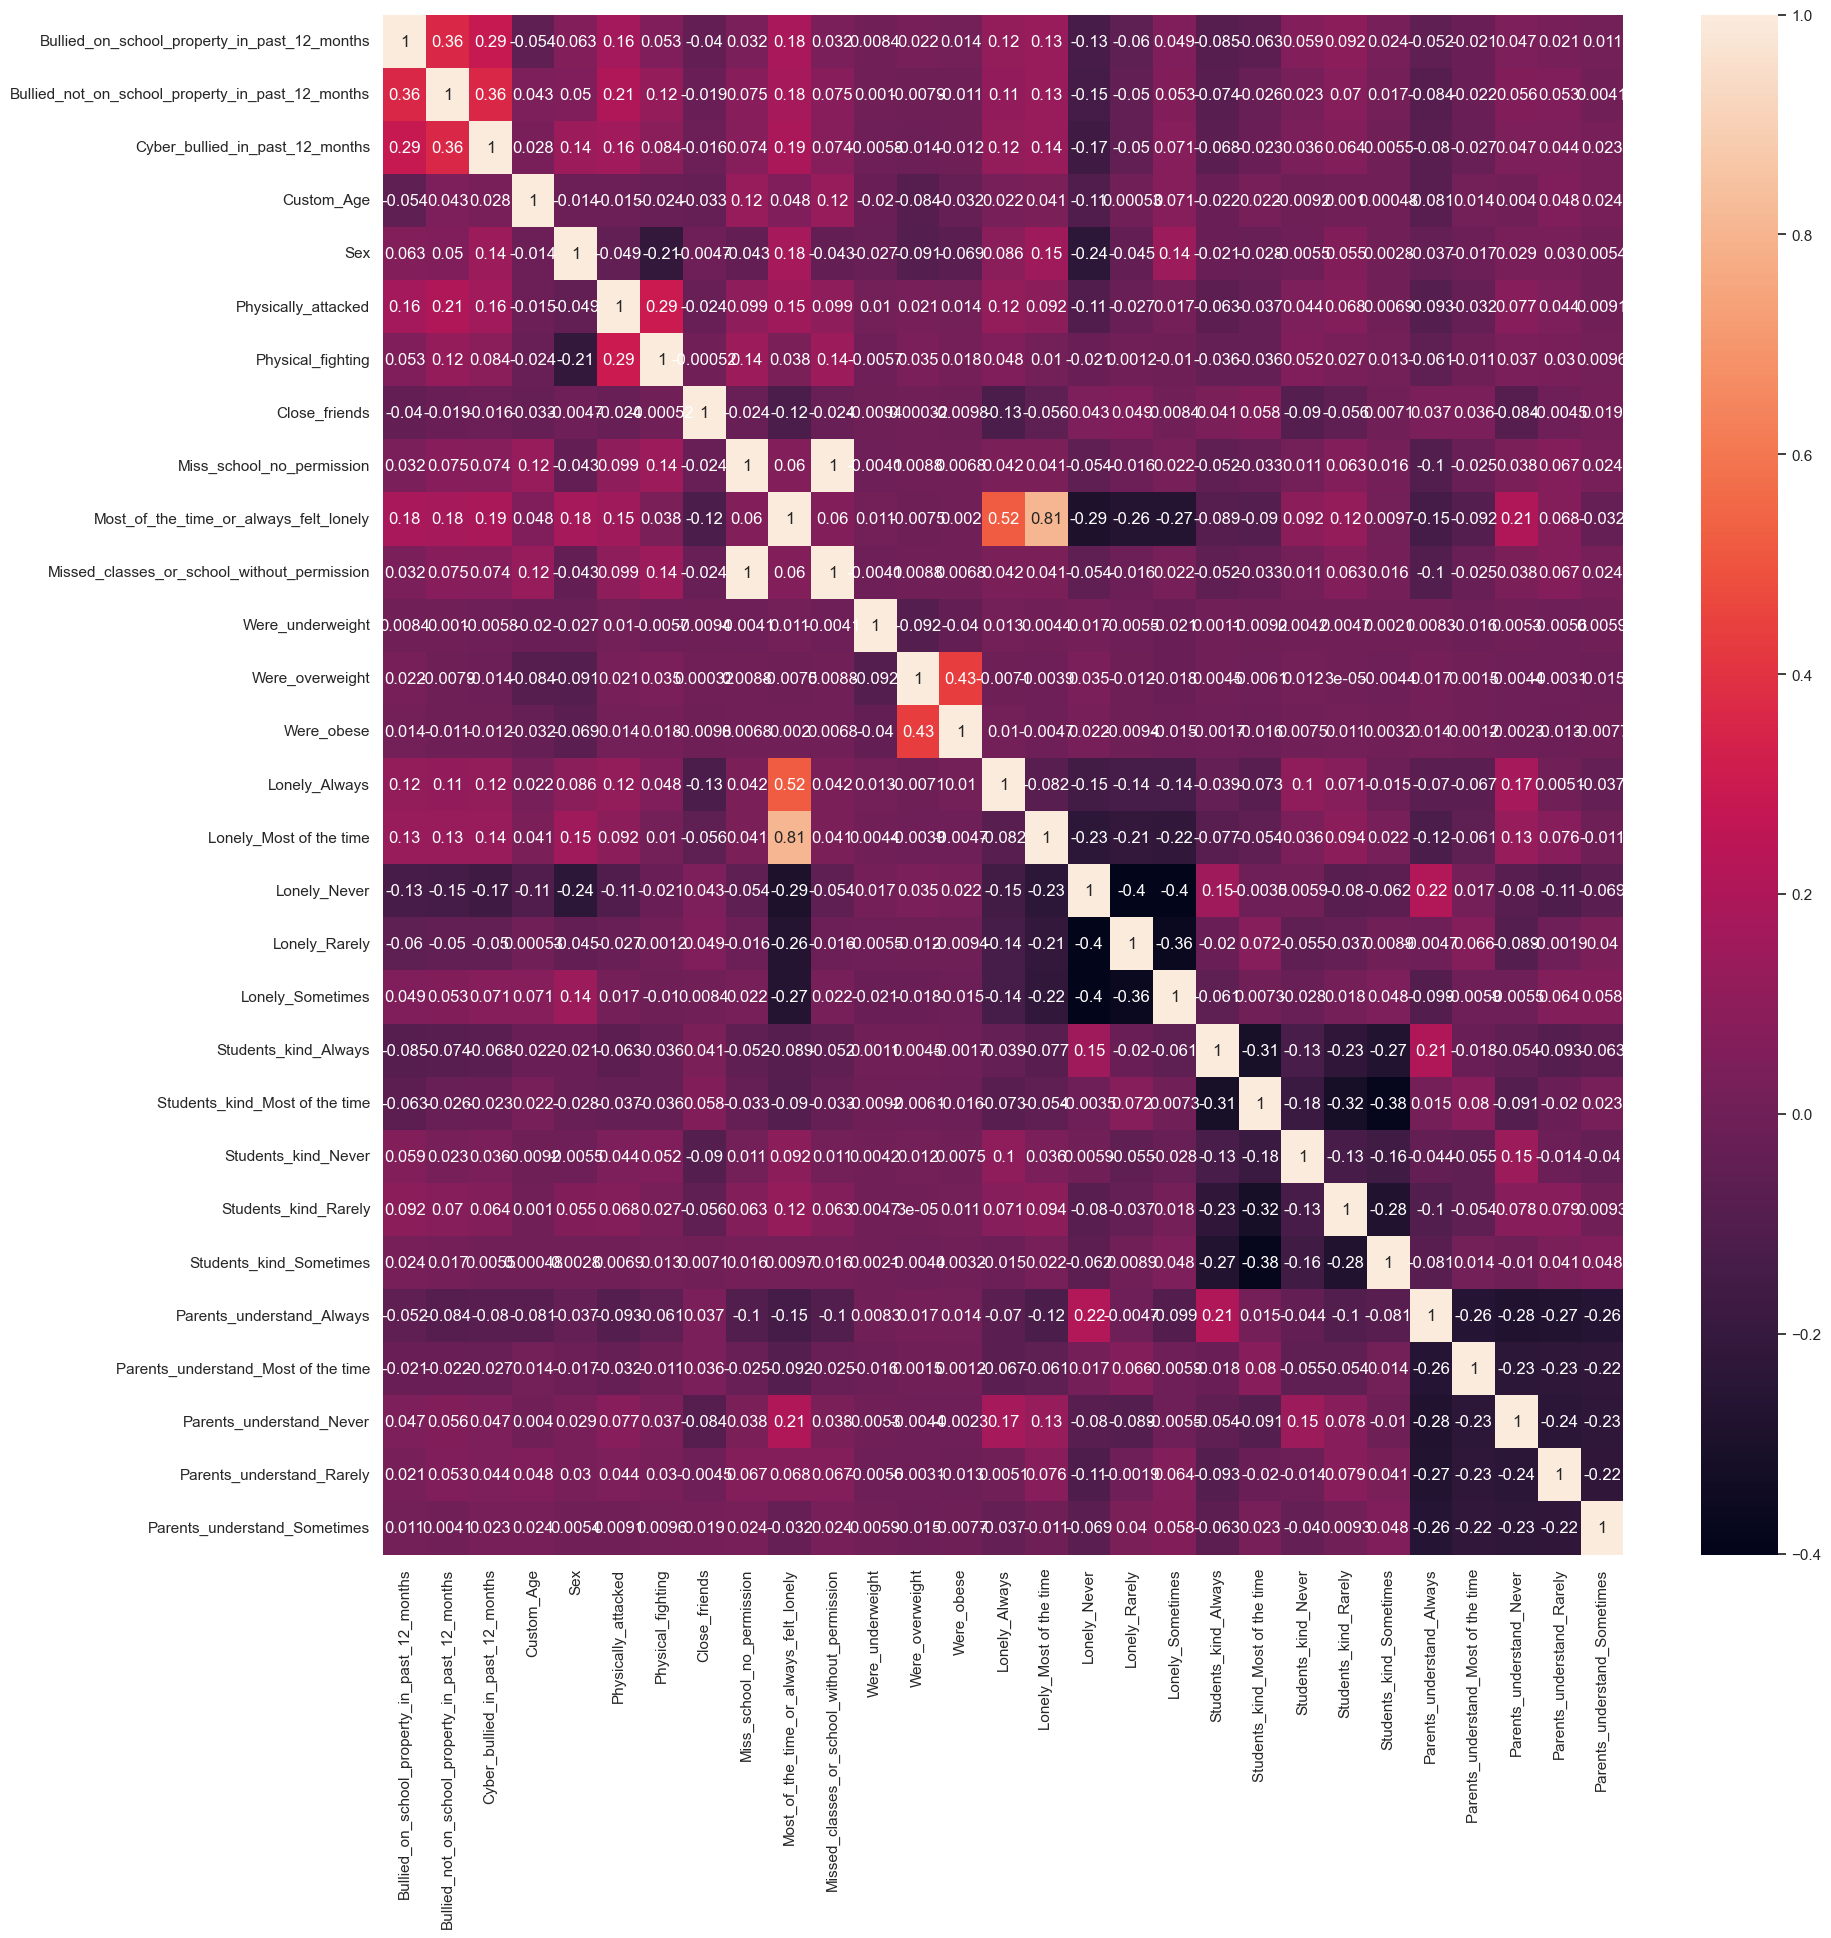

In [364]:
#Correlación entre variables
sns.set(rc = {'figure.figsize': (20,20)})
sns.heatmap(df.corr(), annot=True)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33654 entries, 2 to 56980
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Bullied_on_school_property_in_past_12_months      33654 non-null  object
 1   Bullied_not_on_school_property_in_past_12_months  33654 non-null  object
 2   Cyber_bullied_in_past_12_months                   33654 non-null  object
 3   Custom_Age                                        33654 non-null  object
 4   Sex                                               33654 non-null  object
 5   Physically_attacked                               33654 non-null  object
 6   Physical_fighting                                 33654 non-null  object
 7   Close_friends                                     33654 non-null  object
 8   Miss_school_no_permission                         33654 non-null  object
 9   Most_of_the_time_or_always_f

In [304]:
#Cambiamos el tipo de las columnas de object a int
df.iloc[:,0:14] = df.iloc[:,0:14].astype(int)

In [305]:
df.dtypes

Bullied_on_school_property_in_past_12_months        int32
Bullied_not_on_school_property_in_past_12_months    int32
Cyber_bullied_in_past_12_months                     int32
Custom_Age                                          int32
Sex                                                 int32
Physically_attacked                                 int32
Physical_fighting                                   int32
Close_friends                                       int32
Miss_school_no_permission                           int32
Most_of_the_time_or_always_felt_lonely              int32
Missed_classes_or_school_without_permission         int32
Were_underweight                                    int32
Were_overweight                                     int32
Were_obese                                          int32
Lonely_Always                                       uint8
Lonely_Most of the time                             uint8
Lonely_Never                                        uint8
Lonely_Rarely 

<AxesSubplot:xlabel='Custom_Age', ylabel='count'>

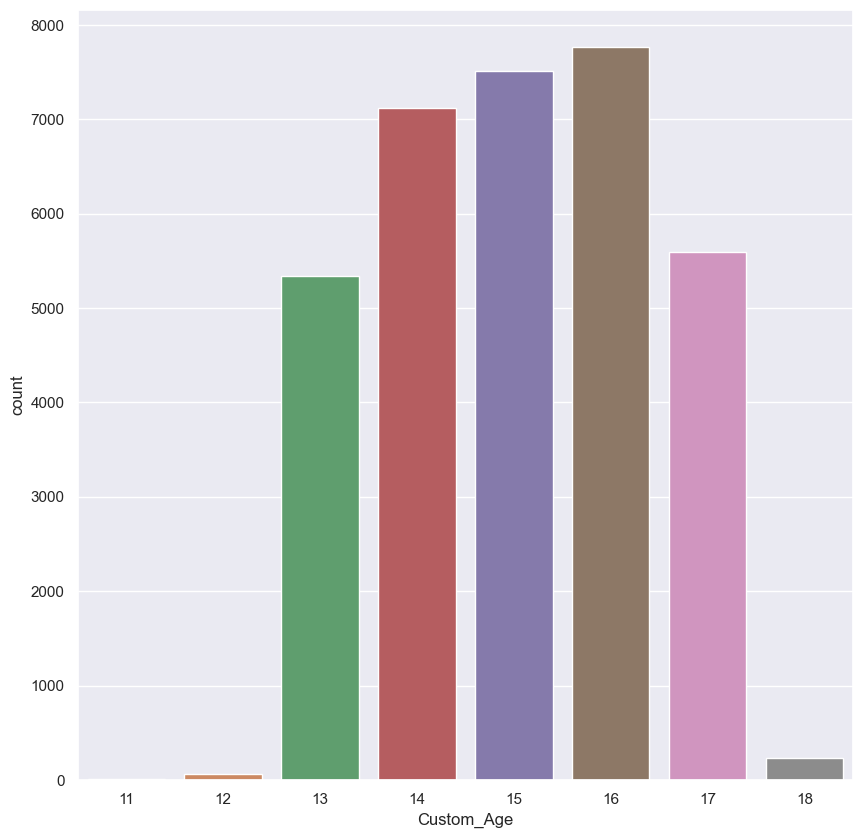

In [357]:
plt.figure(figsize=(10, 10))
sns.countplot(x=df['Custom_Age'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

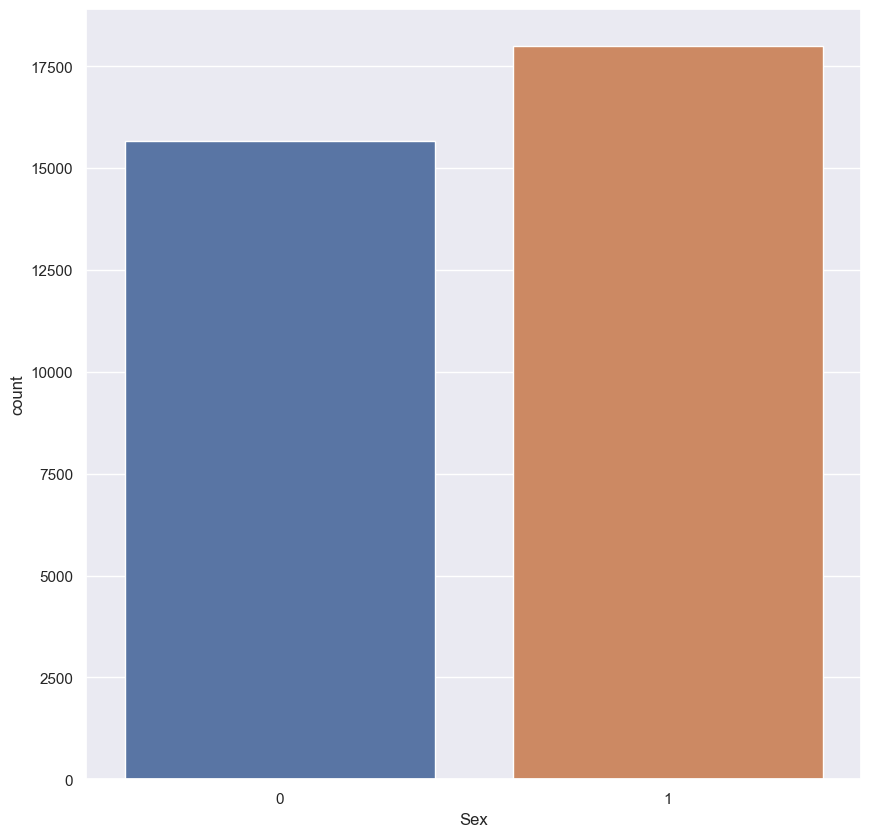

In [359]:
plt.figure(figsize=(10, 10))
sns.countplot(x=df['Sex'])

In [361]:
from wordcloud import WordCloud

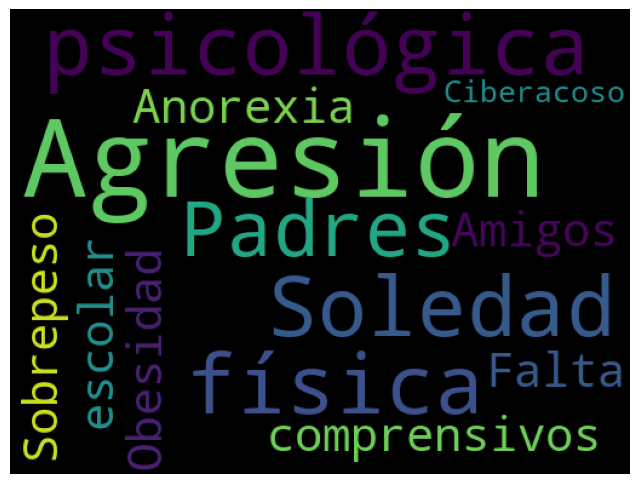

In [362]:
cod = ['Soledad', 'Agresión física', 'Agresión psicológica', 'Padres comprensivos', 'Sobrepeso', 'Obesidad', 'Anorexia', 'Amigos', 'Falta escolar','Ciberacoso']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='black',
                          width=512,
                          height=384
                         ).generate(" ".join(cod))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

## Pruebas de distintos modelos de ML

In [306]:
# Probamos Hist Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
seed = 2023

In [307]:
#Separación train y test
x = df.drop(columns="Bullied_on_school_property_in_past_12_months")
y = df['Bullied_on_school_property_in_past_12_months']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

In [308]:
print("Total features shape:", x.shape)
print("Train features shape:", x_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", x_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (33654, 28)
Train features shape: (26923, 28)
Train target shape: (26923,)
Test features shape: (6731, 28)
Test target shape: (6731,)


In [309]:
#Entrenamiento
model = HistGradientBoostingClassifier(max_bins=255, max_iter=120, learning_rate=0.2)
model.fit(x_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.2, max_iter=120)

In [310]:
#Predicciones
y_pred = model.predict(x_test)

In [365]:
#Evaluación del modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

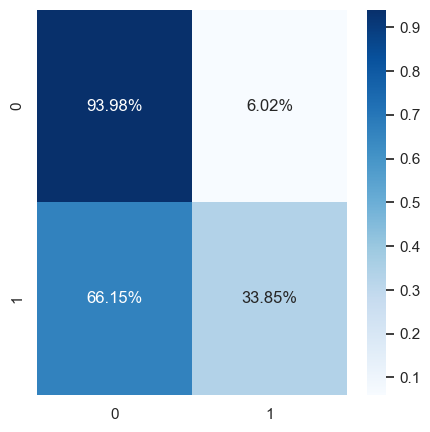

In [366]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [373]:
print(f'El accuracy del test es: {accuracy_score(y_pred,y_test)*100} %')
print(f'El F1 Score del test es: {f1_score(y_pred,y_test)*100} %')
print(f'La precisión del test es: {precision_score(y_pred, y_test)*100} %')
print(f'La sensibilidad del test es: {recall_score(y_pred, y_test)*100}%')

El accuracy del test es: 81.88976377952756 %
El F1 Score del test es: 42.903981264637004 %
La precisión del test es: 33.85070214338507 %
La sensibilidad del test es: 58.567774936061376%


In [314]:
#Sacamos la probabilidad con la que el modelo considera que cada registro pueda pertenecer a una clase u otra (0 o 1)
proba = model.predict_proba(x_test)
df_proba = pd.DataFrame(data=proba, columns=["0", "1"])
df_proba

,0,1
0,0.815731,0.184269
1,0.704994,0.295006
2,0.944509,0.055491
3,0.414180,0.585820
4,0.853056,0.146944
...,...,...
6726,0.914001,0.085999
6727,0.897741,0.102259
6728,0.694086,0.305914
6729,0.888004,0.111996


In [315]:
#Optimización de hiperparámetros para Hist GradientBoosting Classifier
param_HGB = {'loss': ['auto', 'binary_crossentropy'],
            'learning_rate':[0.001, 0.01, 0.1],
            'max_iter': [100, 200, 500, 1000],
            'max_bins': [255],
            }
grid_hgb = GridSearchCV(
    estimator= HistGradientBoostingClassifier(random_state=seed),
    param_grid=param_HGB,
    scoring='accuracy',
    n_jobs=-1)

grid_hgb.fit(x_train, y_train)


GridSearchCV(estimator=HistGradientBoostingClassifier(random_state=2023),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['auto', 'binary_crossentropy'],
                         'max_bins': [255], 'max_iter': [100, 200, 500, 1000]},
             scoring='accuracy')

In [316]:
print("Mejores parámetros:", grid_hgb.best_params_,)
print("Score:", grid_hgb.best_score_)

# Obtengo mejores resultados con los parámetros que apliqué antes del GridSearch

Mejores parámetros: {'learning_rate': 0.01, 'loss': 'auto', 'max_bins': 255, 'max_iter': 500}
Score: 0.8145082647991713


In [317]:
#Support Vector Machine
from sklearn.svm import SVC

In [318]:
#Entrenamos
model_svc = SVC(C=10, kernel= 'rbf', random_state=seed)
model_svc.fit(x_train, y_train)

SVC(C=10, random_state=2023)

In [319]:
#Predicciones
svc_pred = model_svc.predict(x_test)

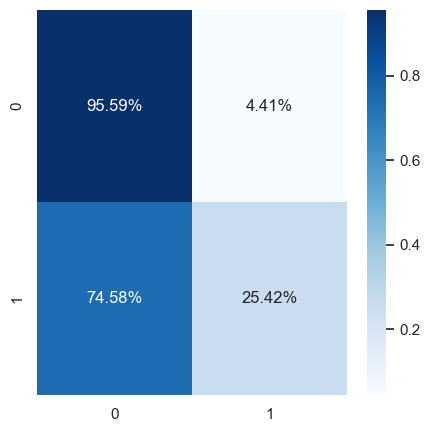

In [376]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, svc_pred, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [372]:
#Evaluación del modelo
print(f'El accuracy del test es: {accuracy_score(svc_pred,y_test)*100} %')
print(f'El F1 Score del test es: {f1_score(svc_pred,y_test)*100} %')
print(f'La precisión del test es: {precision_score(svc_pred, y_test)*100} %')
print(f'La sensibilidad del test es: {recall_score(svc_pred, y_test)*100}%')

El accuracy del test es: 81.48863467538256 %
El F1 Score del test es: 35.57394002068252 %
La precisión del test es: 25.4249815225425 %
La sensibilidad del test es: 59.20826161790017%


In [321]:
#Optimización de hiperparámetros para SVC
param_svc = {'kernel': ['rbf', 'linear'],
            'gamma':[1, 0.1, 0.01, 0.001],
            'C': [0.1, 1, 10, 100, 1000]
            }
grid_svc = GridSearchCV(
    estimator= HistGradientBoostingClassifier(random_state=seed),
    param_grid=param_HGB,
    scoring='accuracy',
    n_jobs=-1)

grid_svc.fit(x_train, y_train)

GridSearchCV(estimator=HistGradientBoostingClassifier(random_state=2023),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['auto', 'binary_crossentropy'],
                         'max_bins': [255], 'max_iter': [100, 200, 500, 1000]},
             scoring='accuracy')

In [322]:
print("Mejores parámetros:", grid_svc.best_params_,)
print("Score:", grid_svc.best_score_)

Mejores parámetros: {'learning_rate': 0.01, 'loss': 'auto', 'max_bins': 255, 'max_iter': 500}
Score: 0.8145082647991713


In [323]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

In [324]:
#Entrenamos
model_ada = AdaBoostClassifier(n_estimators=100, random_state=seed)
model_ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=2023)

In [325]:
#Predicciones
ada_pred = model_ada.predict(x_test)

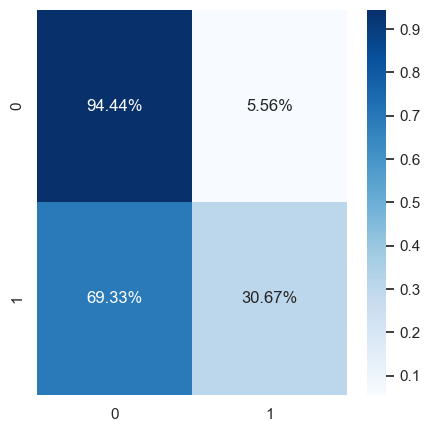

In [377]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, ada_pred, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [371]:
#Evaluación del modelo
print(f'El accuracy del test es: {accuracy_score(ada_pred,y_test)*100} %')
print(f'El F1 Score del test es: {f1_score(ada_pred,y_test)*100} %')
print(f'La precisión del test es: {precision_score(ada_pred, y_test)*100} %')
print(f'La sensibilidad del test es: {recall_score(ada_pred, y_test)*100}%')

El accuracy del test es: 81.62234437676422 %
El F1 Score del test es: 40.154813739719394 %
La precisión del test es: 30.672579453067257 %
La sensibilidad del test es: 58.123249299719895%


In [327]:
#Optimización de hiperparámetros para AdaBoost
ada = AdaBoostClassifier(random_state=seed)
param_ada = {
    "n_estimators": [10,20,40,60,80,100,200],
    "learning_rate": [0.1, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "algorithm": ["SAMME", "SAMME.R"]
}
grid_ada = GridSearchCV(estimator=ada, param_grid=param_ada)
grid_ada.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=2023),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8,
                                           0.9, 1],
                         'n_estimators': [10, 20, 40, 60, 80, 100, 200]})

In [328]:
print("Mejores parámetros:", grid_ada.best_params_,)
print("Score:", grid_ada.best_score_)

Mejores parámetros: {'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 20}
Score: 0.8138395410728994


In [277]:
#XGBoost
from xgboost import XGBClassifier

In [278]:
model_xgb = XGBClassifier(n_estimators = 100, 
                          random_state = seed,
                          eval_metric = 'error',
                          learning_rate = 0.2,
                          objective = 'binary:logistic'
                          )
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=2023, reg_alpha=0, reg_lambda=1, ...)

In [279]:
#Predicciones
xgb_pred = model_xgb.predict(x_test)

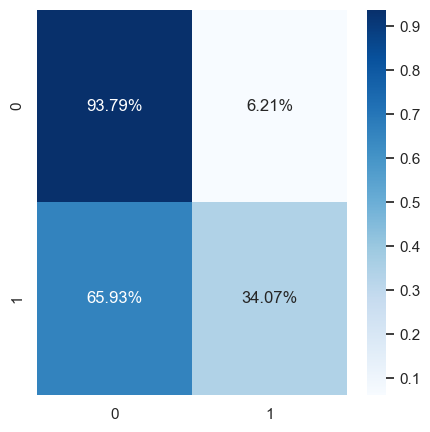

In [378]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, xgb_pred, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [375]:
#Evaluación del modelo
print(f'El accuracy del test es: {accuracy_score(xgb_pred,y_test)*100} %')
print(f'El F1 Score del test es: {f1_score(xgb_pred,y_test)*100} %')
print(f'La precisión del test es: {precision_score(xgb_pred, y_test)*100} %')
print(f'La sensibilidad del test es: {recall_score(xgb_pred, y_test)*100}%')

El accuracy del test es: 81.7857673451196 %
El F1 Score del test es: 42.92364990689013 %
La precisión del test es: 34.07243163340724 %
La sensibilidad del test es: 57.9874213836478%


In [281]:
#Optimización de hiperparámetros para XGBoost
xgb = XGBClassifier(random_state=seed)
param_xgb = {
    "n_estimators": [10,40,60,100,200],
    "learning_rate": [0.1, 0.25, 0.5, 0.7, 0.9, 1],
    "objective": ['binary:logistic'],
    'booster': ['gbtree'],
    'gamma': [0, 0.2, 0.5],
    'max_depth': [3, 5, 7, 9, 10]
}
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_xgb)
grid_xgb.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     n

In [282]:
print("Mejores parámetros:", grid_xgb.best_params_,)
print("Score:", grid_xgb.best_score_)

Mejores parámetros: {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.25, 'max_depth': 5, 'n_estimators': 10, 'objective': 'binary:logistic'}
Score: 0.8151396068822511


In [336]:
xgb_pred_proba = model_xgb.predict_proba(x_test)[:,1]

## Resultados

In [344]:
print("Score Hist GradientBoosting Classifier:", (grid_hgb.best_score_*100).round(3))
print("Score SVM:", (grid_svc.best_score_* 100).round(3))
print("Score AdaBoost:", (grid_ada.best_score_ *100).round(3))
print("Score XGBoost:", (grid_xgb.best_score_*100).round(3))

Score Hist GradientBoosting Classifier: 81.451
Score SVM: 81.451
Score AdaBoost: 81.384
Score XGBoost: 81.514


In [387]:
resultados = pd.DataFrame([grid_hgb.best_score_,grid_svc.best_score_, grid_ada.best_score_, grid_xgb.best_score_], columns=["Score"], index=["HGB", "SVM", "ADA", "XGB"])

In [388]:
resultados["F1 Score"] = f1_score(y_pred,y_test), f1_score(svc_pred,y_test), f1_score(ada_pred,y_test), f1_score(xgb_pred,y_test)
resultados["Precisión"] = precision_score(y_pred,y_test), precision_score(svc_pred,y_test), precision_score(ada_pred,y_test), precision_score(xgb_pred,y_test)
resultados["Recall"] = recall_score(y_pred,y_test), recall_score(svc_pred,y_test), recall_score(ada_pred,y_test), recall_score(xgb_pred,y_test)

In [389]:
resultados

,Score,F1 Score,Precisión,Recall
HGB,0.814508,0.429040,0.338507,0.585678
SVM,0.814508,0.355739,0.254250,0.592083
ADA,0.813840,0.401548,0.306726,0.581232
XGB,0.815140,0.429236,0.340724,0.579874


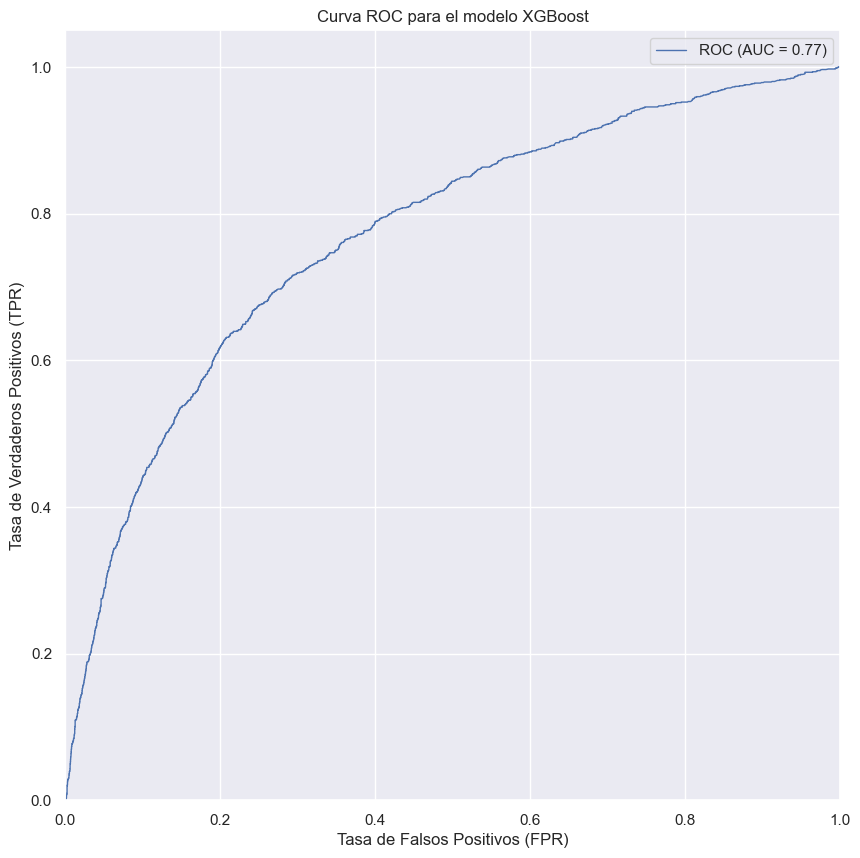

In [363]:
#Calculamos y visualizamos la curva ROC y el AUC para el modelo con mejor resultado
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_proba)
xgb_auc = auc(fpr,tpr)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (xgb_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para el modelo XGBoost')
plt.legend(loc="upper right")
plt.show()


In [390]:
#Guardar el modelo
import pickle

with open('model.pickle', "wb") as modelo_HGB:
    pickle.dump(model, modelo_HGB)
    
with open ('model_svc.pickle', "wb") as modelo_SVC:
    pickle.dump(model_svc, modelo_SVC)

with open ('model_ada.pickle', "wb") as modelo_ADA:
    pickle.dump(model_ada, modelo_ADA)

with open ('model_xgb.pickle', "wb") as modelo_XGB:
    pickle.dump(model_xgb, modelo_XGB)
